<a href="https://colab.research.google.com/github/Dukzf1v/AIO_Exercises/blob/main/M02W02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np

In [13]:
vector1 = np.array([2,3,6])
vector2 = np.array([1,2,3])
matrix = np.array([[1,2,3],[4,9,6],[7,2,9]])
matrix1 = np.arange(1,10).reshape(3,3)

In [14]:
#Length of a vector
def compute_vector_length ( vector ):
  len_of_vector = np.linalg.norm(vector)
  return len_of_vector
print(compute_vector_length(vector2))

3.7416573867739413


In [16]:
#dot product 2 vectors
def compute_dot_product(vector1,vector2):
  result = np.dot(vector1,vector2)
  return result
compute_dot_product(vector1, vector2)

26

In [17]:
#dot product matrix, vector
def matrix_multi_vector(matrix, vector):
  result = np.dot(matrix, vector)
  return result
matrix_multi_vector(matrix, vector1)

array([26, 71, 74])

In [18]:
#dot product matrix, matrix
def matrix_multi_matrix(matrix, matrix1):
  result = np.dot(matrix, matrix1)
  return result
matrix_multi_matrix(matrix, matrix1)

array([[ 30,  36,  42],
       [ 82, 101, 120],
       [ 78,  96, 114]])

In [19]:
#inverse matrix
def inverse_matrix(matrix):
  result = np.linalg.inv(matrix)
  return result
inverse_matrix(matrix)

array([[-0.82142857,  0.14285714,  0.17857143],
       [-0.07142857,  0.14285714, -0.07142857],
       [ 0.6547619 , -0.14285714, -0.01190476]])

In [20]:
#eigenvalues/vectors
def compute_eigenvalues_eigenvectors(matrix):
  eigenvalues, eigenvectors = np.linalg.eig(matrix)
  nomarlized_eigenvectors = eigenvectors/np.linalg.norm(eigenvectors, axis = 0)
  return eigenvalues, nomarlized_eigenvectors
compute_eigenvalues_eigenvectors(matrix)

(array([14.64936532, -1.05980899,  5.41044367]),
 array([[-0.24097728, -0.81921612, -0.02720329],
        [-0.78163513, -0.01617097, -0.84973965],
        [-0.57530555,  0.57325688,  0.52650025]]))

In [21]:
#cosine similarity
def compute_cosine (v1 , v2) :
  cos_sim = np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))
  return cos_sim
compute_cosine(vector1, vector2)

0.9926846128175763

###Background Subtraction

In [3]:
!gdown '1Z-QYvJ7kczGdG9oaR7gcCoX-mj7PaVgJ'
!gdown '1TUaNXHo7DAm_hr69d6z_Elf72JnikWpT'
!gdown '1KouaTDEUa4NHWtJfIA4_s_EdghUzieEn'

Downloading...
From: https://drive.google.com/uc?id=1Z-QYvJ7kczGdG9oaR7gcCoX-mj7PaVgJ
To: /content/GreenBackground.png
100% 5.51k/5.51k [00:00<00:00, 24.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1TUaNXHo7DAm_hr69d6z_Elf72JnikWpT
To: /content/NewBackground.jpg
100% 64.3k/64.3k [00:00<00:00, 110MB/s]
Downloading...
From: https://drive.google.com/uc?id=1KouaTDEUa4NHWtJfIA4_s_EdghUzieEn
To: /content/Object.png
100% 51.0k/51.0k [00:00<00:00, 71.5MB/s]


In [5]:

from google.colab.patches import cv2_imshow
import cv2
import matplotlib.pyplot as plt


In [41]:
bg1_image = cv2.imread('GreenBackground.png', 1)
bg1_image = cv2.resize(bg1_image, (600,300))

bg2_image = cv2.imread('NewBackground.jpg', 1)
bg2_image = cv2.resize(bg2_image, (600,300))

ob_image = cv2.imread('Object.png', 1)
ob_image = cv2.resize(ob_image, (600,300))

In [42]:

def compute_difference(bg1_img, ob_img):
    difference_single_channel = cv2.absdiff(bg1_img, ob_img)
    #covert to 1 single channel
    difference_single_channel = np.sum(difference_single_channel, axis=2) / 3.0
    difference_single_channel = difference_single_channel.astype(np.uint8)
    return difference_single_channel

In [43]:
def compute_binary_mask ( difference_single_channel ) :
  _, difference_binary = cv2.threshold(difference_single_channel, 15, 255, cv2.THRESH_BINARY)
  difference_binary = np.stack((difference_binary,)*3, axis=2)
  return difference_binary

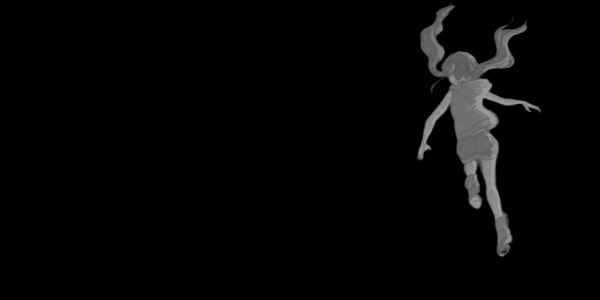

-----------------------------------------------------------------------


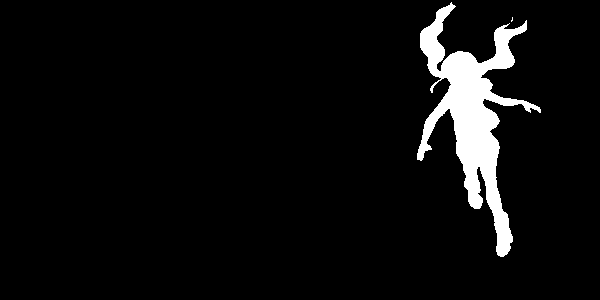

-----------------------------------------------------------------------


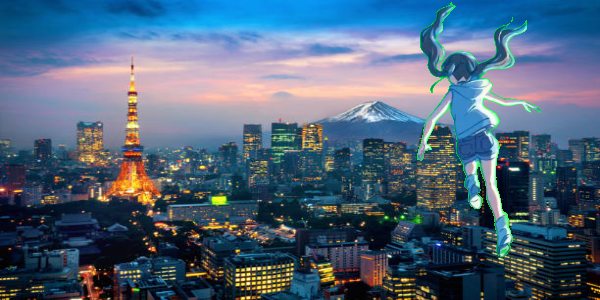

In [44]:
difference_single_channel = compute_difference(bg1_image, ob_image)
cv2_imshow(difference_single_channel)
print("-----------------------------------------------------------------------")
binary_mask = compute_binary_mask(difference_single_channel)
cv2_imshow(binary_mask)
print("-----------------------------------------------------------------------")
output = np.where(binary_mask == 0, bg2_image, ob_image)
cv2_imshow(output)